<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python/blob/main/10_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

예측 분석 : 시계열 분석(timeseries)

자기상관성을 가진 데이터(auotocorelation)
* lag(시차)
* shift
* diff(차분 = 미분)
* resample(시간을 채움)(어떤 데이터는 분이고 어떤 데이터는 시간일때 두 값을 맞춰주는)
* interpolate(빈 데이터를 채울때)
* fill

시계열 데이터는 하나의 데이터에서 벌어지는 일(데이터 자체가 하나의 열) (앞뒤로 작업)

시간index
* datetime
* timedelta
* period
* interval
* range(초기값, 한계값, 증감값):list
* arange : ndarray
* Date_range, Timedelta_range, Period range, Interval_range

In [ ]:
import datetime #date, time 패키지가 따로 있는 것을 결합한 것
#시간 : 입출력은 문자열, 메모리에서는 특별한 대접(숫자도 문자도 아님)
str_time='2023-07-20 17:31:49'
time=datetime.datetime.strptime(str_time, "%Y-%m-%d %H:%M:%S") #strptime : str을 time으로 parsing해라
print(time)

2023-07-20 17:31:49


In [ ]:
import numpy as np
now=np.datetime64('now')
print(now)

2023-11-19T23:36:12


In [ ]:
import time
x=time.time() #현재 시간을 초단위로 변환
print("Timestamp : ",x)

Timestamp :  1700436972.9620543


날짜연산

In [ ]:
date=np.array('2015-07-04',dtype=np.datetime64)
print(date)
date+np.arange(12)

2015-07-04


array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [ ]:
import pandas as pd
pd.Timestamp('2023-11-01T12')

Timestamp('2023-11-01 12:00:00')

In [ ]:
tm=pd.Timestamp(year=2023,month=11,day=8,hour=12)
tm.day_of_week #요일 숫자   #0 월 1 화 2 수 3 목 4 금 5 토 6 일

2

In [ ]:
tm.to_numpy()

numpy.datetime64('2023-11-08T12:00:00.000000000')

In [ ]:
#datetime과 pandas 시간과 호환이 됨
now=datetime.datetime.now()
df=pd.DataFrame({'value':[1,2,3]},index=[now,now+pd.Timedelta(days=1), now+pd.Timedelta(days=2)])
df

AttributeError: ignored

In [ ]:
#freq = 'D' 빈도
pd.timedelta_range(start='1 day',periods=4)

TimedeltaIndex(['1 days', '2 days', '3 days', '4 days'], dtype='timedelta64[ns]', freq='D')

In [ ]:
start=pd.Period('2023-07-20')
middle=pd.Period('2023-07-21')
end=pd.Period('2023-07-22')
df=pd.DataFrame({"value":[1,2,3]},index=[start,middle,end])
df

,value
2023-07-20,1
2023-07-21,2
2023-07-22,3


In [ ]:
pd.period_range(start='2017-01-01',end='2018-01-01',freq='M')

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
             '2018-01'],
            dtype='period[M]')

In [ ]:
iv=pd.Interval(left=0,right=5)
iv

Interval(0, 5, closed='right')

In [ ]:
pd.interval_range(start=0,end=5)

IntervalIndex([(0, 1], (1, 2], (2, 3], (3, 4], (4, 5]], dtype='interval[int64, right]')

In [ ]:
range_date=pd.date_range(start='1/1/2019',end='1/08/2019',freq='Min')
print(range_date)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 00:01:00',
               '2019-01-01 00:02:00', '2019-01-01 00:03:00',
               '2019-01-01 00:04:00', '2019-01-01 00:05:00',
               '2019-01-01 00:06:00', '2019-01-01 00:07:00',
               '2019-01-01 00:08:00', '2019-01-01 00:09:00',
               ...
               '2019-01-07 23:51:00', '2019-01-07 23:52:00',
               '2019-01-07 23:53:00', '2019-01-07 23:54:00',
               '2019-01-07 23:55:00', '2019-01-07 23:56:00',
               '2019-01-07 23:57:00', '2019-01-07 23:58:00',
               '2019-01-07 23:59:00', '2019-01-08 00:00:00'],
              dtype='datetime64[ns]', length=10081, freq='T')


In [ ]:
date_index=pd.date_range('2015-07-03','2016-07-10')
data=pd.Series(range(1,375),index=date_index)
data.tail()

2016-07-06    370
2016-07-07    371
2016-07-08    372
2016-07-09    373
2016-07-10    374
Freq: D, dtype: int64

In [ ]:
data['2016-04-01':'2016-04-02']

2016-04-01    274
2016-04-02    275
Freq: D, dtype: int64

In [ ]:
data['2015-07']

2015-07-03     1
2015-07-04     2
2015-07-05     3
2015-07-06     4
2015-07-07     5
2015-07-08     6
2015-07-09     7
2015-07-10     8
2015-07-11     9
2015-07-12    10
2015-07-13    11
2015-07-14    12
2015-07-15    13
2015-07-16    14
2015-07-17    15
2015-07-18    16
2015-07-19    17
2015-07-20    18
2015-07-21    19
2015-07-22    20
2015-07-23    21
2015-07-24    22
2015-07-25    23
2015-07-26    24
2015-07-27    25
2015-07-28    26
2015-07-29    27
2015-07-30    28
2015-07-31    29
Freq: D, dtype: int64

In [ ]:
data['2015']

2015-07-03      1
2015-07-04      2
2015-07-05      3
2015-07-06      4
2015-07-07      5
             ... 
2015-12-27    178
2015-12-28    179
2015-12-29    180
2015-12-30    181
2015-12-31    182
Freq: D, Length: 182, dtype: int64

In [ ]:
pd.date_range('2015-07-03',periods=8) #freq='D'

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03',periods=8,freq='M')

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31', '2016-01-31', '2016-02-29'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
from pandas.tseries.offsets import BDay #Business day
pd.date_range('2015-07-01',periods=5,freq=BDay()) #'2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06', '2015-07-07' : 4일 5일이 없는 이유 : 비즈니스 데이라서 토,일 제외

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
idx=pd.date_range('2018-01-01',periods=5,freq='H')
ts=pd.Series(range(len(idx)),index=idx)
ts

2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [ ]:
#ts.resample('2H').mean() #값이 2시간씩 묶이고 평균을 내줌
ts.resample('2H').mean() #값이 2시간씩 묶이고 평균을 내줌

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [ ]:
index=pd.date_range('1/1/2000',periods=4,freq='T')
series=pd.Series([0.0,None,2.0,3.0],index=index)
df=pd.DataFrame({'s':series})
df

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq='30S')

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,NaN
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq='30S',fill_value=9.0) #30초 단위로 9.0을 채움

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,9.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,9.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,9.0
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq='30S',method='bfill') #뒤에 있는 값으로 앞에 값을 채움

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,NaN
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,2.0
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,3.0
2000-01-01 00:03:00,3.0


In [ ]:
df.asfreq(freq='30S',method='ffill') #앞에 있는 값으로 뒤의 값을 채움

,s
2000-01-01 00:00:00,0.0
2000-01-01 00:00:30,0.0
2000-01-01 00:01:00,NaN
2000-01-01 00:01:30,NaN
2000-01-01 00:02:00,2.0
2000-01-01 00:02:30,2.0
2000-01-01 00:03:00,3.0


In [ ]:
df = pd.DataFrame({'a':  [1, 2, 3, 4, 5, 6],
                    'b': [1, 1, 2, 3, 5, 8],
                    'c': [1, 4, 9, 16, 25, 36]})
df

,a,b,c
0,1,1,1
1,2,1,4
2,3,2,9
3,4,3,16
4,5,5,25
5,6,8,36


차분 : 비정상성 데이터를 정상성을 가진 시계열 데이터로 변환

log, exp, sqrt : 정규분포가 아닌 데이터를 정규분포로 변환할 때 사용해준 것들(비정상성 데이터를 정상성으로 바꿀 때도 사용)

ARIMA : accuracy를 높이려면 가능한한 정상성을 지닌 데이터를 넣어줘야함

In [ ]:
print(df.diff())

#     a    b     c
#0  NaN  NaN   NaN
#1  1.0  0.0   3.0  4-1
#2  1.0  1.0   5.0  9-4
#3  1.0  1.0   7.0 16-9
#4  1.0  2.0   9.0 25-16
#5  1.0  3.0  11.0 36-25
#  정상 비정  정상

     a    b     c
0  NaN  NaN   NaN
1  1.0  0.0   3.0
2  1.0  1.0   5.0
3  1.0  1.0   7.0
4  1.0  2.0   9.0
5  1.0  3.0  11.0


In [ ]:
print(df.diff(periods=3))

#     a    b     c
#0  NaN  NaN   NaN
#1  NaN  NaN   NaN
#2  NaN  NaN   NaN
#3  3.0  2.0  15.0
#4  3.0  4.0  21.0
#5  3.0  6.0  27.0


     a    b     c
0  NaN  NaN   NaN
1  NaN  NaN   NaN
2  NaN  NaN   NaN
3  3.0  2.0  15.0
4  3.0  4.0  21.0
5  3.0  6.0  27.0


In [ ]:
rng=pd.date_range('1/1/2014',periods=12,freq='T') #freq='M' : 월 / freq='T' or 'Min' : 분
ts=pd.Series(np.arange(12),index=rng)
print(ts)
print("-----------------------/")
print(ts.resample('5min').mean()) #DatetimeIndexResampler
print("-----------------------/")
print(ts.resample('5min').ohlc()) #ohlc() :  open(개장가), high(고가), low(저가), close(종가)

2014-01-01 00:00:00     0
2014-01-01 00:01:00     1
2014-01-01 00:02:00     2
2014-01-01 00:03:00     3
2014-01-01 00:04:00     4
2014-01-01 00:05:00     5
2014-01-01 00:06:00     6
2014-01-01 00:07:00     7
2014-01-01 00:08:00     8
2014-01-01 00:09:00     9
2014-01-01 00:10:00    10
2014-01-01 00:11:00    11
Freq: T, dtype: int64
-----------------------/
2014-01-01 00:00:00     2.0
2014-01-01 00:05:00     7.0
2014-01-01 00:10:00    10.5
Freq: 5T, dtype: float64
-----------------------/
                     open  high  low  close
2014-01-01 00:00:00     0     4    0      4
2014-01-01 00:05:00     5     9    5      9
2014-01-01 00:10:00    10    11   10     11


In [ ]:
res=ts.resample('5Min').ohlc()
res['open']

2014-01-01 00:00:00     0
2014-01-01 00:05:00     5
2014-01-01 00:10:00    10
Freq: 5T, Name: open, dtype: int64

In [ ]:
rng=pd.date_range('1/1/2014',periods=1000,freq='D')
ts=pd.Series(np.arange(1000),index=rng)
print(ts)

2014-01-01      0
2014-01-02      1
2014-01-03      2
2014-01-04      3
2014-01-05      4
             ... 
2016-09-22    995
2016-09-23    996
2016-09-24    997
2016-09-25    998
2016-09-26    999
Freq: D, Length: 1000, dtype: int64


In [ ]:
print(ts.groupby(lambda x:x.month).mean())

1     380.000000
2     413.964706
3     439.333333
4     469.833333
5     500.333333
6     530.833333
7     561.333333
8     592.333333
9     605.220930
10    470.500000
11    501.000000
12    531.500000
dtype: float64


In [ ]:
print(ts.groupby(lambda x:x.weekday).mean())

0    502.0
1    499.5
2    497.0
3    498.0
4    499.0
5    500.0
6    501.0
dtype: float64


0.5195405819347292


[]

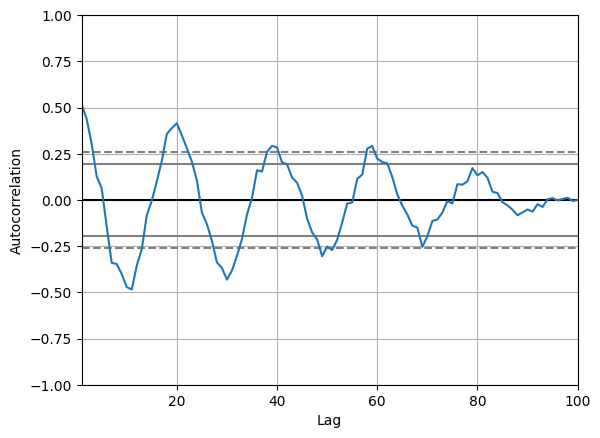

In [ ]:
import matplotlib.pyplot as plt
#주기성 있는 데이터 : 시계열 데이터
spacing = np.linspace(-5*np.pi,5*np.pi,num=100)
s=pd.Series(0.7*np.random.rand(100)+0.3*np.sin(spacing))
print(s.autocorr()) #자기상관성
#0.431732821964793
#상관계수의 값의 범위(-1(강한 음의 상관성)  ~ 1(강한 양의 상관성),0(상관없음))
x=pd.plotting.autocorrelation_plot(s) #이상데이터 확인 : 정상데이터로 변환
x.plot()

In [ ]:
#durbin_watson : 자기상관성 분석
from statsmodels.stats.stattools import durbin_watson
g=np.array([1,2,3])
gfg=durbin_watson(g)
gfg

0.14285714285714285

In [ ]:
#선형회귀 모델
import numpy as np
import pandas as pd
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})
df

,rating,points,assists,rebounds
0,90,25,5,11
1,85,20,7,8
2,82,14,7,10
3,88,16,8,6
4,94,27,5,6
5,90,20,7,9
6,76,12,6,6
7,75,15,9,10
8,87,14,9,10
9,86,19,5,7


In [ ]:
#ols : ordinary least square(평범한 최소제곱법을 이용한 선형회귀)
#statsmodels : 파이썬에서 r을 구현하게 함
from statsmodels.formula.api import ols
model=ols('rating~points+assists+rebounds',data=df).fit() #종속변수 : rating, 독립변수 : points+assists+rebounds
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     3.299
Date:                Sun, 19 Nov 2023   Prob (F-statistic):             0.0995
Time:                        23:36:15   Log-Likelihood:                -26.862
No. Observations:                  10   AIC:                             61.72
Df Residuals:                       6   BIC:                             62.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.4716     14.588      4.282      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
durbin_watson(model.resid) #잔차를 이용해서 durbin_watson값 확인

2.3920546872335353

시계열 데이터 분해

pandas에서 시계열 데이터로 구분하는 기준 : 인덱스가 time계열일 때

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
df=pd.read_csv('/content/drive/MyDrive/mirae/AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   AirPassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
from datetime import datetime
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df.index=df['Month']
df

,Month,AirPassengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [ ]:
#SVD(singular value decomposition) 특이행렬분해
#시계열 분석 float 숫자
#가법 모델(+) : addictive, 승법모델(*) : multiplicative 둘다 적용해보고 올바르게 분리된 데이터 사용
#del df["Month"]
decomposed=seasonal_decompose(df,model='addictive')

TypeError: ignored

In [ ]:
trend=decomposed.trend #추세
seasonal=decomposed.seasonal #계절성변동(주기성)
residual=decomposed.resid #잔차

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["AirPassengers"],label="original")
plt.plot(trend,label='trend')
plt.plot(seasonal,label='seasonal')
plt.plot(residual,label='residual')
plt.legend()
plt.show()

In [ ]:
!pip install -U finance-datareader #주식시장
!pip install pandas-datareader     #미국시장
!pip install --upgrade mplfinance

In [ ]:
import pandas_datareader as pdr
gs=pdr.get_data_fred('GS10')
print(gs.shape)
print(gs.head())
pdr.nasdaq_trader.get_nasdaq_symbols()

In [ ]:
import FinanceDataReader as fdr
df_krx=fdr.StockListing('KOSPI')
df_krx.head()

In [ ]:
samsung=fdr.DataReader('005930','2020-1-1','2022-12-31')
samsung.head()

In [ ]:
samsung['Close'].plot()

In [ ]:
fig=plt.figure(figsize=(12,8))
top_axes=plt.subplot2grid((4,4),(0,0),rowspan=3,colspan=4)
bottom_axes=plt.subplot2grid((4,4),(3,0),rowspan=1,colspan=4)
bottom_axes.get_yaxis().get_major_formatter().set_scientific(False)
top_axes.plot(samsung.index,samsung['Close'],label='Adjusted Close')
bottom_axes.plot(samsung.index,samsung['Volume']) #['Volume'] : 거래

plt.tight_layout() #여백없이 타이트하게 출력
plt.show()

In [ ]:
!pip install mpl-finance

In [ ]:
import matplotlib.ticker as ticker
import mpl_finance as matfin
import datetime
start = datetime.datetime(2019,3,1)
end = datetime.datetime(2019,3,31)
hynix = fdr.DataReader('000660', start, end)
print(hynix.head(10))

In [ ]:
fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
day_list=range(len(hynix))
name_list=[]
for day in hynix.index:
  name_list.append(day.strftime('%d')) #시간을 문자열 format
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list)) #개수 지정
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list)) #출력글자 지정
matfin.candlestick2_ohlc(ax,hynix['Open'],hynix['High'],hynix['Low'],hynix['Close'],width=0.5,colorup='r',colordown='b')
plt.show()

In [ ]:
#문제
#AAPL, MSFT, AMZN의 주식 데이터를 2010-01-01부터 2016-12-31까지 다운로드한 다음 종가만 수집하시오
#결측치 처리하시오 (dropna)
#20,60일 이동평균을 구하고 시각화하시오
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 12, 31)

AAPL = yf.download('AAPL', start=start, end=end)
MSFT = yf.download('MSFT', start=start, end=end)
AMZN = yf.download('AMZN', start=start, end=end)

AAPL_close = AAPL['Close']
MSFT_close = MSFT['Close']
AMZN_close = AMZN['Close']

AAPL_close = AAPL_close.dropna()
MSFT_close = MSFT_close.dropna()
AMZN_close = AMZN_close.dropna()

AAPL_roll20 = AAPL_close.rolling(window=20, min_periods=20).mean()
MSFT_roll20 = MSFT_close.rolling(window=20, min_periods=20).mean()
AMZN_roll20 = AMZN_close.rolling(window=20, min_periods=20).mean()

AAPL_roll60 = AAPL_close.rolling(window=60, min_periods=60).mean()
MSFT_roll60 = MSFT_close.rolling(window=60, min_periods=60).mean()
AMZN_roll60 = AMZN_close.rolling(window=60, min_periods=60).mean()

df = pd.DataFrame({'AAPL20': AAPL_roll20 ,'MSFT20': MSFT_roll20 ,'AMZN20': AMZN_roll20, 'AAPL60': AAPL_roll60, 'MSFT60': MSFT_roll60, 'AMZN60': AMZN_roll60})

df.plot()
plt.show()